In [1]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import math
import matplotlib
from scipy.fftpack import fft
from math import pow
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
from scipy import signal
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from statsmodels.nonparametric.smoothers_lowess import lowess 
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Helper Function 

In [2]:
# Butter worth filter 

def filter_butterworth(temp):
    
    butter, atemp = signal.butter(3, 0.05, btype='lowpass', analog=False)
    filter_a      = signal.filtfilt(butter, atemp, temp)
    
    return filter_a 

def butterworth(x):
    
    butter, atemp = signal.butter(8, 0.05, btype='lowpass', analog=False)
    filter_b      = signal.filtfilt(butter, atemp, x)
    
    return filter_b

def calculate_butterworth(read_variable):
    
    filtere = read_variable.apply(Butterworth_filter(read_variable))
    stat    = calc_summary(filtere)
    
    return stat

def acc_butterworth():
    
    read_read_variableSignal = acc_read_variable["ax"]
    b, a                     = signal.butter(3, 0.03, btype='lowpass', analog=False)
    filter_a                 = signal.filtfilt(b, a, read_read_variableSignal)
    
    return filter_a


#calculate absolute acceleration 

def absolute_function(x,y,z):
    
    total = np.sqrt(x*x + y*y + z*z)
   
    return total 

def acc_bessellow():
    
    raw_signal = acc_read_variable["ax"]
    d, c       = signal.bessel(3, 0.03, 'low', analog=False, norm='phase')
    result     = signal.filtfilt(d, c, raw_signal)
    
    return result

#lowess filter
def loweesfilter():
    
    low_smooth = lowess(acc_read_variable["ax"], np.arange(acc_read_variable["time"].shape[0]), frac=0.01)
    
    return low_smooth

def kalmanfileter(): 
    
    # Read read_variable
    var_a = acc_read_variable[["ax"]].values
    kf    = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    kf    = kf.em(var_a, n_iter=5)
    (filtered_state_means, filtered_state_covariances) = kf.filter(acc_read_variable["ax"])
    
    return kf

def height_count():
   
    # calculate max_height
    counter = 0 
    temp_max_height, _   = signal.find_peaks(variable1, prominence  = 0.5)
    temp_shape, _        = signal.find_peaks(-variable1, prominence = 0.5)
    
    temp_figure          = matplotlib.pyplot.gcf()
    
    plt.plot(variable1, label ="Leveling the read data ", color = 'Orange')
    
    plt.plot(temp_max_height, variable1[temp_max_height], "+", label="Max-height")
    
    #plt.plot(temp_shape, variable1[temp_shape], "-", label="Narrow Shape")
    
    plt.plot(np.zeros_like(variable1), "--", color="#A2142F")

    #counter++
    #print("Height Maximum got ={}".format(len(temp_max_height)+len(temp_shape)))

#https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
def calculate_distance(lat,lon): 
   
    R    = 6371; # Radius of the earth in km
    dLat = ((lat.shift(-1) - lat).dropna())*(np.pi/180);
    dLon = ((lon.shift(-1) - lon).dropna())*(np.pi/180); 
    a    = np.sin(dLat/2) * np.sin(dLat/2) + np.cos((lat)*(np.pi/180)) * np.cos((lat.shift(-1)))*(np.pi/180) * np.sin(dLon/2) * np.sin(dLon/2)
    
    c    = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)); 
    d    = R * c * 1000; # Distance in meters)
    
    return d

# https://stackoverflow.com/questions/26245539/i-need-to-write-a-program-in-python-to-calculate-the-calories-burned-while-doing    
def calories_count(acceleration_avg ):
    
    
    temp_force       = 90* acceleration_avg 
    
    # Converting into meters 
    temp_distance    = (0.38)/0.00062137
    temp_work        = temp_force*temp_distance
    
    # Converting into calories 
    result_calories  = (temp_work)/4184 
    
    return result_calories

#FFT analysis frequency of steps
def fourier_transform_x_dataset(timeInitial,timeEnd, count_samples):
    
    # get number of samples
    var_x         = np.linspace(0.0,count_samples * ((timeEnd - timeInitial)/count_samples), count_samples)
    
    fft_y         = scipy.fft(np.sin(50.0 * 2.0*np.pi*var_x) + 0.5*np.sin(80.0 * 2.0*np.pi*var_x))

    fft_x         = np.linspace(0.0, 1.0/(2.0*((timeEnd -timeInitial)/count_samples)), count_samples//2)
    
    return fft_x

def fourier_transform_y_dataset(timeInitial,timeEnd, count_samples):
    
    # get number of samples
    var_x         = np.linspace(0.0,count_samples * ((timeEnd - timeInitial)/count_samples), count_samples)
    
    fft_y         = scipy.fft(np.sin(50.0 * 2.0*np.pi*var_x) + 0.5*np.sin(80.0 * 2.0*np.pi*var_x))
   
    fft_x         = np.linspace(0.0, 1.0/(2.0*((timeEnd -timeInitial)/count_samples)), count_samples//2)
    
    return fft_y

# Reading, Cleaning data from different csv set for Comparison

In [3]:
# Reading the variable from CSV files 
read_variable        = pd.read_csv("lhs_swing.csv")
read_variable1       = pd.read_csv("knee_left.csv")

read_variable2       = pd.read_csv("drive_left.csv")
read_variable3       = pd.read_csv("drive_right.csv")

read_variable4       = pd.read_csv("stairs_left.csv")
read_variable5       = pd.read_csv("knee_left.csv")

read_variable6       = pd.read_csv("left_hand.csv")
read_variable7       = pd.read_csv("drive_left.csv")

# For acceleration 
acc_read_variable = pd.read_csv("Gps_left.csv")

read_variable['ax']  = filter_butterworth(read_variable['ax'])
read_variable1['ax']  = filter_butterworth(read_variable1['ax'])
read_variable2['ax']  = filter_butterworth(read_variable2['ax'])
read_variable3['ax']  = filter_butterworth(read_variable3['ax'])
read_variable4['ax']  = filter_butterworth(read_variable4['ax'])
read_variable5['ax']  = filter_butterworth(read_variable5['ax'])
read_variable6['ax']  = filter_butterworth(read_variable6['ax'])
read_variable7['ax']  = filter_butterworth(read_variable7['ax'])

read_variable['ay']  = filter_butterworth(read_variable['ay'])
read_variable1['ay']  = filter_butterworth(read_variable1['ay'])
read_variable2['ay']  = filter_butterworth(read_variable2['ay'])
read_variable3['ay']  = filter_butterworth(read_variable3['ay'])
read_variable4['ay']  = filter_butterworth(read_variable4['ay'])
read_variable5['ay']  = filter_butterworth(read_variable5['ay'])
read_variable6['ay'] = filter_butterworth(read_variable6['ay'])
read_variable7['ay'] = filter_butterworth(read_variable7['ay'])


read_variable['az'] = filter_butterworth(read_variable['az'])
read_variable1['az'] = filter_butterworth(read_variable1['az'])
read_variable2['az'] = filter_butterworth(read_variable2['az'])
read_variable3['az'] = filter_butterworth(read_variable3['az'])
read_variable4['az'] = filter_butterworth(read_variable4['az'])
read_variable5['az'] = filter_butterworth(read_variable5['az'])
read_variable6['az'] = filter_butterworth(read_variable6['az'])
read_variable7['az'] = filter_butterworth(read_variable7['az'])

acc_read_variable['ax'] = filter_butterworth(acc_read_variable['ax'])
acc_read_variable['ay'] = filter_butterworth(acc_read_variable['ay'])
acc_read_variable['az'] = filter_butterworth(acc_read_variable['az'])
acc_read_variable = acc_read_variable.loc[:, ~acc_read_variable.columns.str.contains('^Unnamed')]
acc_read_variable['gFx'] = filter_butterworth(acc_read_variable['gFx'])
acc_read_variable['gFy'] = filter_butterworth(acc_read_variable['gFy'])
acc_read_variable['gFz'] = filter_butterworth(acc_read_variable['gFz'])
acc_read_variable = acc_read_variable.drop(acc_read_variable[acc_read_variable.Latitude == 0.0].index)


In [4]:
# read_variable For acceleration containing latitude and longitude (GPS)
acc_read_variable

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Latitude,Longitude,Speed (m/s)
1,0.076,-0.008883,0.017682,0.051777,0.003034,-0.006278,0.049619,0.3421,-0.0852,0.2482,25.257063,83.007888,0.000000
2,0.115,-0.012519,0.031127,0.097775,0.011404,-0.020511,0.067814,0.0020,-0.0008,0.0043,25.257063,83.007888,0.000000
3,0.117,-0.016016,0.044339,0.144260,0.019799,-0.035028,0.086571,0.0020,-0.0008,0.0043,25.257063,83.007888,0.000000
4,0.183,-0.019365,0.057349,0.191348,0.028182,-0.049691,0.106086,-0.0112,-0.0053,0.0194,25.257063,83.007888,0.000000
5,0.184,-0.022555,0.070183,0.239101,0.036533,-0.064371,0.126428,-0.0112,-0.0053,0.0194,25.257063,83.007888,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,26.211,0.003342,0.243180,0.996875,0.127259,0.258493,0.106271,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393
1713,26.212,0.007021,0.247421,1.001322,0.150617,0.273401,0.162311,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393
1714,26.266,0.010507,0.251362,1.005852,0.172338,0.286525,0.219501,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393
1715,26.278,0.013741,0.254950,1.010322,0.192177,0.297842,0.276084,0.0856,-0.0697,0.2982,25.257032,83.007878,0.800393


In [5]:
# Depend upon the data set 
read_variable = read_variable.drop(columns=['gFx', 'gFy','gFz','wx','wy','wz','P'])
read_variable1 = read_variable1.drop(columns=['gFx', 'gFy','gFz','wx','wy','wz','P'])
#read_variable = read_variable.drop(columns=['acc','P'])
#read_variable1 = read_variable1.drop(columns=['acc','P'])

In [6]:
read_variable

,time,ax,ay,az
0,1.198,0.044755,-0.099142,-0.055232
1,1.237,0.053093,-0.090055,-0.043617
2,1.237,0.060827,-0.081064,-0.032662
3,1.238,0.067868,-0.072243,-0.022456
4,1.277,0.074132,-0.063662,-0.013080
...,...,...,...,...
1312,24.926,5.146755,-6.691182,-1.440253
1313,24.963,5.371712,-6.753529,-1.538589
1314,24.964,5.564945,-6.801835,-1.622995
1315,24.964,5.728453,-6.838364,-1.694098


In [7]:
read_variable1

,time,ax,ay,az
0,0.033,-0.062892,0.489421,2.742887
1,0.037,-0.076958,0.441192,2.501001
2,0.038,-0.090793,0.391575,2.258613
3,0.098,-0.104555,0.341105,2.019215
4,0.099,-0.118353,0.290307,1.786038
...,...,...,...,...
1133,24.929,0.088462,0.188502,0.004617
1134,24.988,0.146477,0.222329,-0.036137
1135,24.990,0.201404,0.254085,-0.077608
1136,24.990,0.252330,0.283362,-0.118563


# Acceleration Vs Time

<function matplotlib.pyplot.show(*args, **kw)>

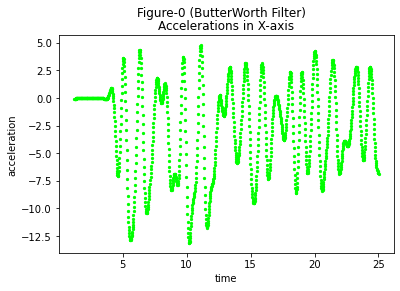

In [8]:
# Graph of accerlration x-axis and time 
read_variable['ax'] = filter_butterworth(read_variable['ax'])

plt.scatter(read_variable['time'],read_variable['ay'],5, color = '#00FF00')

plt.title('Accelerations in X-axis')
plt.xlabel('time')
plt.ylabel('acceleration')
plt.suptitle("ButterWorth Filter")
plt.suptitle('Figure-0 (ButterWorth Filter)')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

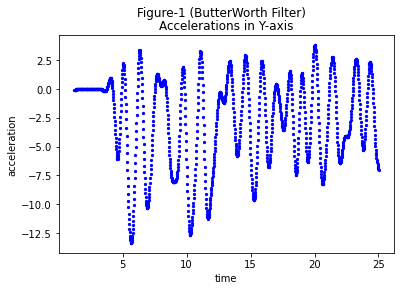

In [9]:
# Graph for accerlration y-axis and time 
read_variable['ay'] = filter_butterworth(read_variable['ay'])

plt.scatter(read_variable['time'],read_variable['ay'],5, color = '#0000FF')

plt.title('Accelerations in Y-axis')
plt.xlabel('time')
plt.ylabel('acceleration')
plt.suptitle("ButterWorth Filter")
plt.suptitle('Figure-1 (ButterWorth Filter)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

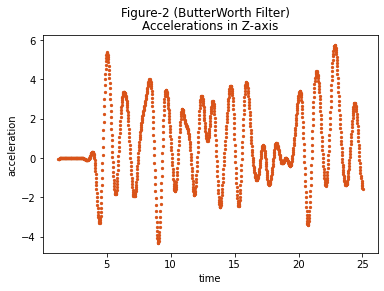

In [10]:
# Graph for accerlration z-axis and time 
read_variable['az'] = filter_butterworth(read_variable['az'])

plt.scatter(read_variable['time'],read_variable['az'],5,color = '#D95319')
plt.title('Accelerations in Z-axis')
plt.xlabel('time')
plt.ylabel('acceleration')
plt.suptitle("ButterWorth Filter")
plt.suptitle('Figure-2 (ButterWorth Filter)')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

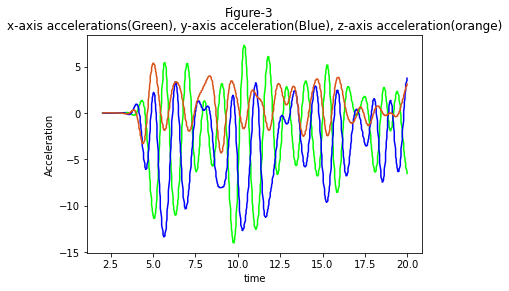

In [11]:
# Tri-acceleration of ax,ay,az with respect to time 
read_variable = read_variable[read_variable['time']>2]
read_variable = read_variable[read_variable['time']<20]

plt.plot(read_variable['time'],read_variable['ax'],color='#00FF00')

plt.plot(read_variable['time'],read_variable['ay'],color='#0000FF')

plt.plot(read_variable['time'],read_variable['az'],color='#D95319')

plt.title('x-axis accelerations(Green), y-axis acceleration(Blue), z-axis acceleration(orange)')
plt.xlabel('time')
plt.ylabel('Acceleration')
plt.suptitle('Figure-3')

plt.show

# Tri-Acceleration Vs Time (ButterWorth Filter)

Text(0, 0.5, 'Acceleration')

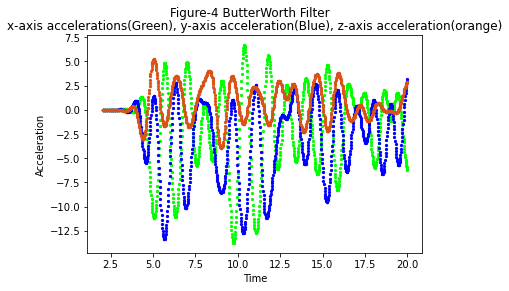

In [12]:
# Tri-acceleration of ax,ay,az with respect to time Using Butter filter 
read_variable['ax'] = filter_butterworth(read_variable['ax'])
read_variable['ay'] = filter_butterworth(read_variable['ay'])
read_variable['az'] = filter_butterworth(read_variable['az'])

plt.scatter(read_variable['time'],read_variable['ax'],5,color='#00FF00')

plt.scatter(read_variable['time'],read_variable['ay'],5, color = '#0000FF')

plt.scatter(read_variable['time'],read_variable['az'],5,color='#D95319')
plt.suptitle("Figure-4 ButterWorth Filter")
plt.title('x-axis accelerations(Green), y-axis acceleration(Blue), z-axis acceleration(orange)')
plt.xlabel('Time')
plt.ylabel('Acceleration')


In [13]:
read_variable1 = read_variable1[read_variable1['time']>2]
read_variable1 = read_variable1[read_variable1['time']<20]

# Comparison of means with respect to absolute acceleration for different Data set

In [14]:
# Total acceleration and comparison  
read_variable['acc']=absolute_function(read_variable['ax'],read_variable['ay'],read_variable['az'])
read_variable1['acc']=absolute_function(read_variable1['ax'],read_variable1['ay'],read_variable1['az'])

read_variable2['acc']=absolute_function(read_variable2['ax'],read_variable2['ay'],read_variable2['az'])
read_variable3['acc']=absolute_function(read_variable3['ax'],read_variable3['ay'],read_variable3['az'])

read_variable4['acc']=absolute_function(read_variable4['ax'],read_variable4['ay'],read_variable4['az'])
read_variable5['acc']=absolute_function(read_variable5['ax'],read_variable5['ay'],read_variable5['az'])

read_variable6['acc']=absolute_function(read_variable6['ax'],read_variable6['ay'],read_variable6['az'])
read_variable7['acc']=absolute_function(read_variable7['ax'],read_variable7['ay'],read_variable7['az'])

x = read_variable['acc'].mean()
y = read_variable1['acc'].mean()

x1 = read_variable2['acc'].mean()
y1 = read_variable3['acc'].mean()

x2 = read_variable4['acc'].mean()
y2 = read_variable5['acc'].mean()

x3 = read_variable6['acc'].mean()
y3 = read_variable7['acc'].mean()

print(x,y)
print(x1,y1)
print(x2,y2)
print(x3,y3)

# As the acceleration of taking phone as a swing in the hand is faster than phone attached to the knee in the first case 

5.969378205836389 0.6414691767595467
1.1576857095522968 0.4970681044690065
0.7891165415304323 0.6111545110423776
0.6273863189245764 1.1576857095522968


# Graphical Comparison using acceleration vs time using different dataset

Text(0.5, 0.98, 'Figure-5')

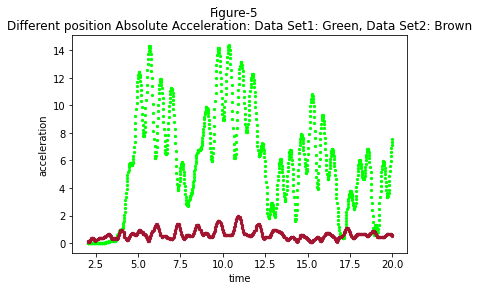

In [15]:
# Graph of Absolute acceleration vs time data set 1 and data set 2 
plt.scatter(read_variable['time'],read_variable['acc'], 5, color = '#00FF00')

plt.scatter(read_variable1['time'],read_variable1['acc'], 5, color = '#A2142F')
plt.title('Different position Absolute Acceleration: Data Set1: Green, Data Set2: Brown')

plt.xlabel('time')

plt.ylabel('acceleration')
plt.suptitle('Figure-5')

Text(0.5, 0.98, 'Figure-6')

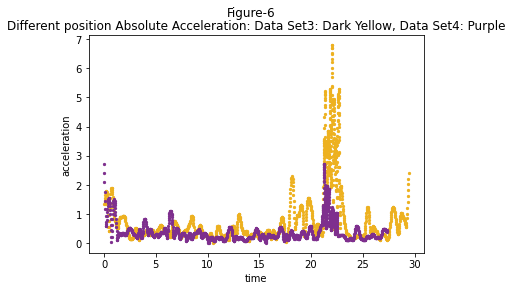

In [16]:
# Dataset 3 and Dataset 4 
plt.scatter(read_variable2['time'],read_variable2['acc'], 5, color = '#EDB120')

plt.scatter(read_variable3['time'],read_variable3['acc'], 5, color = '#7E2F8E')
plt.title('Different position Absolute Acceleration: Data Set3: Dark Yellow, Data Set4: Purple')

plt.xlabel('time')

plt.ylabel('acceleration')
plt.suptitle('Figure-6')

Text(0.5, 0.98, 'Figure-7')

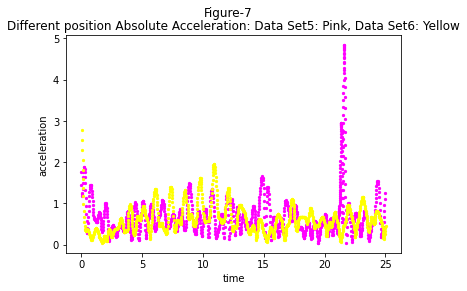

In [17]:
# # Dataset 5 and Dataset 6 
plt.scatter(read_variable4['time'],read_variable4['acc'], 5, color = '#FF00FF')

plt.scatter(read_variable5['time'],read_variable5['acc'], 5, color = '#FFFF00')
plt.title('Different position Absolute Acceleration: Data Set5: Pink, Data Set6: Yellow')

plt.xlabel('time')

plt.ylabel('acceleration')
plt.suptitle('Figure-7')

Text(0.5, 0.98, 'Figure-8')

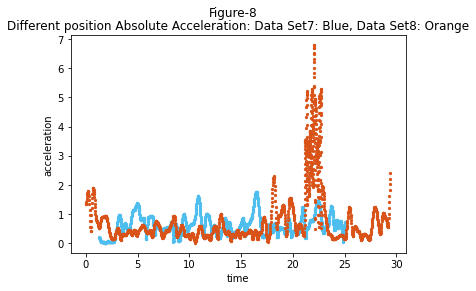

In [18]:
# Dataset 7 and Dataset 8 
plt.scatter(read_variable6['time'],read_variable6['acc'], 5, color = '#4DBEEE')

plt.scatter(read_variable7['time'],read_variable7['acc'], 5, color = '#D95319')

plt.title('Different position Absolute Acceleration: Data Set7: Blue, Data Set8: Orange')

plt.xlabel('time')

plt.ylabel('acceleration')
plt.suptitle('Figure-8')

# Absolute Acceleration vs Time (ButterWorth filter)

Text(0.5, 0.98, 'Figure-9')

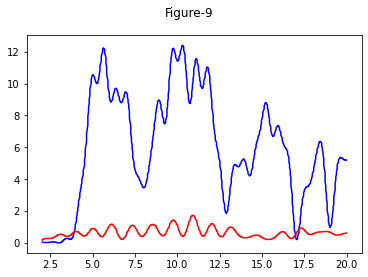

In [19]:
# Applying Butterfilter in absolute acceleration 
read_variable['acc']    = butterworth(read_variable['acc'])
read_variable1['acc']   = butterworth(read_variable1['acc'])

plt.plot(read_variable['time'],read_variable['acc'],color='blue')
plt.plot(read_variable1['time'],read_variable1['acc'],color='red')
plt.suptitle('Figure-9')

# Applying Fourier Transform 

C:\Users\kings\anaconda3\lib\site-packages\ipykernel_launcher.py:120: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
C:\Users\kings\anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


Text(0.5, 0.98, 'Figure-10')

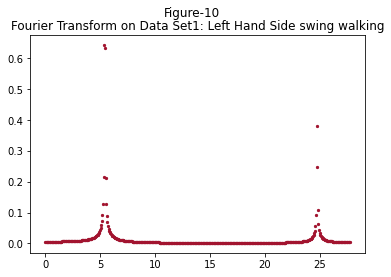

In [20]:
# Fourier Transform Over Data Set 1 
timeInitial   = read_variable["time"].values[0]
timeEnd       = read_variable["time"].values[-1]
count_samples = read_variable["time"].shape[0]

xf = fourier_transform_x_dataset(timeInitial ,timeEnd, count_samples)
yf =  fourier_transform_y_dataset(timeInitial ,timeEnd, count_samples)
plt.title('Fourier Transform on Data Set1: Left Hand Side swing walking')

plt.scatter(xf, 2.0/read_variable['time'].shape[0] * np.abs(yf[0:read_variable['time'].shape[0]//2]), 5, color = '#A2142F')
plt.suptitle('Figure-10')


C:\Users\kings\anaconda3\lib\site-packages\ipykernel_launcher.py:120: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
C:\Users\kings\anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


Text(0.5, 0.98, 'Figure-11')

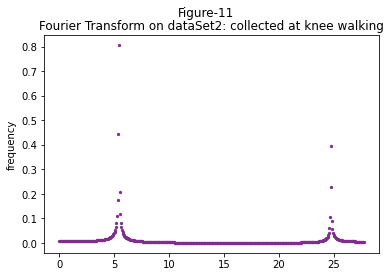

In [21]:
# Fourier Transform Over Data Set 2 
timeInitial   = read_variable1["time"].values[0]
timeEnd       = read_variable1["time"].values[-1]
count_samples = read_variable["time"].shape[0]

xf = fourier_transform_x_dataset(timeInitial, timeEnd, count_samples)
yf = fourier_transform_y_dataset(timeInitial, timeEnd, count_samples)

plt.title('Fourier Transform on dataSet2: collected at knee walking')
plt.ylabel('frequency')

plt.scatter(xf, 2.0/read_variable['time'].shape[0] * np.abs(yf[0:read_variable['time'].shape[0]//2]), 5, color = '#7E2F8E')
plt.suptitle('Figure-11')


C:\Users\kings\anaconda3\lib\site-packages\ipykernel_launcher.py:120: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
C:\Users\kings\anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


Text(0.5, 0.98, 'Figure-12')

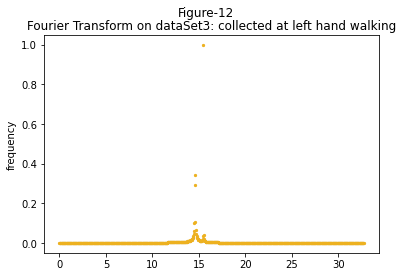

In [22]:
# Fourier Transform Over Data Set 3
timeInitial   = acc_read_variable["time"].values[0]
timeEnd       = acc_read_variable["time"].values[-1]
count_samples = acc_read_variable["time"].shape[0]
xf = fourier_transform_x_dataset(timeInitial, timeEnd, count_samples)
yf = fourier_transform_y_dataset(timeInitial, timeEnd,count_samples)
plt.title('Fourier Transform on dataSet3: collected at left hand walking')
plt.ylabel('frequency')

plt.scatter(xf, 2.0/acc_read_variable['time'].shape[0] * np.abs(yf[0:acc_read_variable['time'].shape[0]//2]), 5, color = '#EDB120')
plt.suptitle('Figure-12')


# Comparison different Filters (Acceleration vs Time)

In [23]:
variable1 =  acc_butterworth()

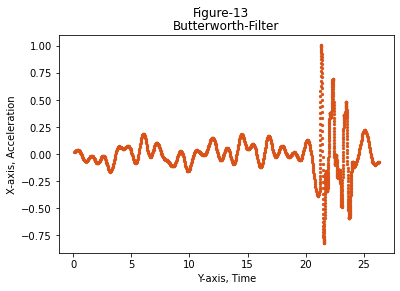

In [24]:
# Comparing the filters for acceleration vs Time 
kf = kalmanfileter()
(filtered_state_means, filtered_state_covariances) = kf.filter(acc_read_variable["ax"])

low_smooth = loweesfilter()
    
fig = matplotlib.pyplot.gcf()

plt.scatter(acc_read_variable["time"], acc_butterworth(), 5, color = '#D95319')

plt.xlabel("Y-axis, Time")
plt.ylabel("X-axis, Acceleration")

plt.title('Butterworth-Filter')
plt.suptitle('Figure-13')
plt.show()


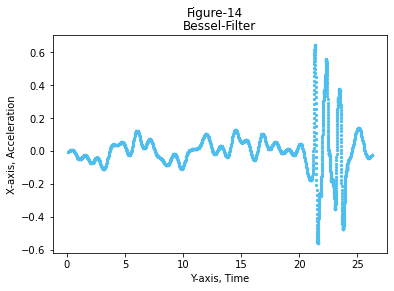

In [25]:
# Bessel-filter 
plt.scatter(acc_read_variable["time"], acc_bessellow(), 5, color = '#4DBEEE')
plt.xlabel("Y-axis, Time")
plt.ylabel("X-axis, Acceleration")

plt.title('Bessel-Filter')
plt.suptitle('Figure-14')
plt.show()

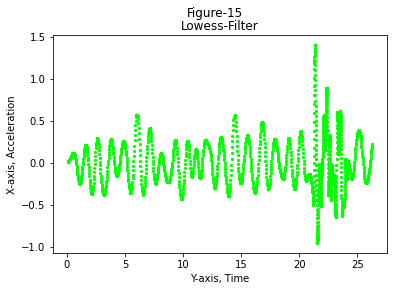

In [26]:
# Lowess-Filter 
plt.scatter(acc_read_variable["time"], low_smooth[:,1],5, color = '#00FF00')
plt.xlabel("Y-axis, Time")
plt.ylabel("X-axis, Acceleration")

plt.title('Lowess-Filter')
plt.suptitle('Figure-15')
plt.show()

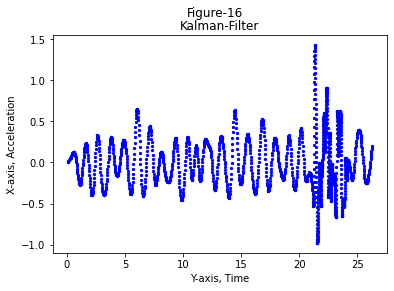

In [27]:
# Kalman Filter 
plt.scatter(acc_read_variable["time"], filtered_state_means, 5, color = '#0000FF')
plt.xlabel("Y-axis, Time")
plt.ylabel("X-axis, Acceleration")

plt.title('Kalman-Filter')
plt.suptitle('Figure-16')
plt.show()

# Analyse the better filter, used for Max height and Smooth curve 

Text(0.5, 0.98, 'Figure-17')

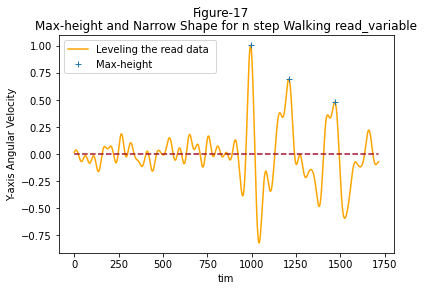

In [28]:
# Above we got the efficent filter method which will use to calculate maximum height,and the smooth Curve in the data  
# Here n depend upon the data set  
height_count()

plt.ylabel("Y-axis Angular Velocity")
plt.xlabel("tim")
plt.title("Max-height and Narrow Shape for n step Walking read_variable")
plt.legend()
plt.suptitle('Figure-17')


# Apply Fourier Transform Max Height in smooth curve

C:\Users\kings\anaconda3\lib\site-packages\ipykernel_launcher.py:120: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
C:\Users\kings\anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


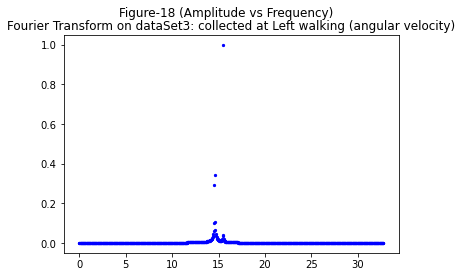

In [29]:
# Fourier Transform is used for calculating maximum height from the smoothed signal 
timeInitial   = acc_read_variable["time"].values[0]
timeEnd       = acc_read_variable["time"].values[-1]
count_samples = acc_read_variable["time"].shape[0]
xf = fourier_transform_x_dataset(timeInitial, timeEnd, count_samples)
yf = fourier_transform_y_dataset(timeInitial, timeEnd, count_samples)

plt.scatter(xf, 2.0/acc_read_variable['time'].shape[0] * np.abs(yf[0:acc_read_variable['time'].shape[0]//2]), 5, color = '#0000FF')

plt.title('Fourier Transform on dataSet3: collected at Left walking (angular velocity)')
plt.suptitle('Figure-18 (Amplitude vs Frequency)')
plt.show()

# Differentiate between different data set (1. Calories 2. Acceleration)

In [30]:
# For Calories Help in differenciate the data set 
# READ THE DATA
running_read_variable=pd.read_csv("lhs_swing.csv")

running_read_variable['ax'] = filter_butterworth(running_read_variable['ax'])
running_read_variable['ay'] = filter_butterworth(running_read_variable['ay'])
running_read_variable['az'] = filter_butterworth(running_read_variable['az'])

In [31]:
#running_read_variable = running_read_variable.drop(columns=['gFx', 'gFy','gFz','wx','wy','wz'])
running_read_variable['acc']=absolute_function(running_read_variable['ax'],running_read_variable['ay'],running_read_variable['az'])
running_read_variable['az'] = running_read_variable['az'].abs()
read_variable2['az'] = read_variable2['az'].abs()
read_variable3['az'] = read_variable3['az'].abs()
read_variable4['az'] = read_variable4['az'].abs()
read_variable5['az'] = read_variable5['az'].abs()
read_variable6['az'] = read_variable6['az'].abs()
read_variable7['az'] = read_variable7['az'].abs()

In [32]:
acceleration_avg = running_read_variable['az'].mean()
print("Calorie for left swing:")
print (calories_count(acceleration_avg))



Calorie for left swing:
22.338844918375557


In [33]:
acceleration_avg = read_variable1['az'].mean()
print("Calorie for walking left knee:")
print (calories_count(acceleration_avg))

Calorie for walking left knee:
3.6437927951514064


In [34]:
acceleration_avg = read_variable2['az'].mean()
print("Calorie for drive left :")
print (calories_count(acceleration_avg))

Calorie for drive left :
10.631603972590032


In [35]:
acceleration_avg = read_variable3['az'].mean()
print("Calorie for drive right :")
print (calories_count(acceleration_avg))

Calorie for drive right :
4.57225203745976


In [36]:
acceleration_avg = read_variable4['az'].mean()
print("Calorie for stairs left :")
print (calories_count(acceleration_avg))

Calorie for stairs left :
8.006438922509524


In [37]:
acceleration_avg = read_variable5['az'].mean()
print("Calorie for knee left :")
print (calories_count(acceleration_avg))

Calorie for knee left :
5.361854572375806


In [38]:
acceleration_avg = read_variable6['az'].mean()
print("Calorie for left hand:")
print (calories_count(acceleration_avg))

Calorie for left hand:
3.2710701189747775


In [39]:
acceleration_avg = read_variable7['az'].mean()
print("Calorie for drive left:")
print (calories_count(acceleration_avg))

Calorie for drive left:
10.631603972590032


In [40]:
running_read_variable['Calories'] = calories_count(acceleration_avg)

# Linear Regression

In [41]:
# Accuracy check- Machine learning tool for Calories As we used acceleration so linear regression will do the work 
X = running_read_variable[['az']]
y = running_read_variable['Calories']
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print(model.coef_[0], model.intercept_)

-1.615215295909694e-31 10.63160397259003


In [42]:
# Calculating distance from absolute sum 

In [43]:
acc_read_variable['Absolute_sum']=absolute_function(acc_read_variable['Latitude'],acc_read_variable['Longitude'],0)
calculate_distance(acc_read_variable['Latitude'], acc_read_variable['Longitude']).sum()

8.730437620797263

In [44]:
acc_read_variable

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Latitude,Longitude,Speed (m/s),Absolute_sum
1,0.076,-0.008883,0.017682,0.051777,0.003034,-0.006278,0.049619,0.3421,-0.0852,0.2482,25.257063,83.007888,0.000000,86.765366
2,0.115,-0.012519,0.031127,0.097775,0.011404,-0.020511,0.067814,0.0020,-0.0008,0.0043,25.257063,83.007888,0.000000,86.765366
3,0.117,-0.016016,0.044339,0.144260,0.019799,-0.035028,0.086571,0.0020,-0.0008,0.0043,25.257063,83.007888,0.000000,86.765366
4,0.183,-0.019365,0.057349,0.191348,0.028182,-0.049691,0.106086,-0.0112,-0.0053,0.0194,25.257063,83.007888,0.000000,86.765366
5,0.184,-0.022555,0.070183,0.239101,0.036533,-0.064371,0.126428,-0.0112,-0.0053,0.0194,25.257063,83.007888,0.000000,86.765366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,26.211,0.003342,0.243180,0.996875,0.127259,0.258493,0.106271,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393,86.765347
1713,26.212,0.007021,0.247421,1.001322,0.150617,0.273401,0.162311,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393,86.765347
1714,26.266,0.010507,0.251362,1.005852,0.172338,0.286525,0.219501,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393,86.765347
1715,26.278,0.013741,0.254950,1.010322,0.192177,0.297842,0.276084,0.0856,-0.0697,0.2982,25.257032,83.007878,0.800393,86.765347


# Walking Speed (Accelerometre)

In [45]:
# Calculating the walking speed from accelerometre 
# https://electronics.stackexchange.com/questions/112421/measuring-speed-with-3axis-accelerometer
acc_read_variable1 = pd.read_csv("Gps_left.csv")
acc_read_variable2 = pd.read_csv("Gps_right.csv")


acc_read_variable1 = acc_read_variable1.loc[:, ~acc_read_variable1.columns.str.contains('^Unnamed')]
acc_read_variable2 = acc_read_variable2.loc[:, ~acc_read_variable2.columns.str.contains('^Unnamed')]

#acc_read_variable1.ax.abs()
#acc_read_variable1.ay.abs()
#acc_read_variable1.az.abs()

acc_read_variable1['velocity_x'] = 0
acc_read_variable1['velocity_y'] = 0
acc_read_variable1['velocity_z'] = 0
acc_read_variable1['velocity_x'] += acc_read_variable1['ax']*acc_read_variable1['time'] 
acc_read_variable1['velocity_y'] += acc_read_variable1['ay']*acc_read_variable1['time'] 
acc_read_variable1['velocity_z'] += acc_read_variable1['az']*acc_read_variable1['time'] 

acc_read_variable2['velocity_x'] = 0
acc_read_variable2['velocity_y'] = 0
acc_read_variable2['velocity_z'] = 0
acc_read_variable2['velocity_x'] += acc_read_variable2['ax']*acc_read_variable2['time'] 
acc_read_variable2['velocity_y'] += acc_read_variable2['ay']*acc_read_variable2['time'] 
acc_read_variable2['velocity_z'] += acc_read_variable2['az']*acc_read_variable2['time'] 



In [46]:
#https://physics.stackexchange.com/questions/153159/calculate-speed-from-accelerometer
acc_read_variable1['Speed'] = (acc_read_variable1['velocity_x']*acc_read_variable1['velocity_x'] + acc_read_variable1['velocity_y']*acc_read_variable1['velocity_y']+ acc_read_variable1['velocity_z']*acc_read_variable1['velocity_z']) 
acc_read_variable2['Speed'] = (acc_read_variable2['velocity_x']*acc_read_variable2['velocity_x'] + acc_read_variable2['velocity_y']*acc_read_variable2['velocity_y']+ acc_read_variable2['velocity_z']*acc_read_variable2['velocity_z']) 

In [47]:
#https://stackoverflow.com/questions/37256540/applying-sqrt-function-on-a-column
acc_read_variable1['Speed'] =acc_read_variable1['Speed'].pow(1./2)
acc_read_variable2['Speed'] =acc_read_variable2['Speed'].pow(1./2)

In [48]:
acc_read_variable1 


,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Latitude,Longitude,Speed (m/s),velocity_x,velocity_y,velocity_z,Speed
0,0.074,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3421,-0.0852,0.2482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.076,0.0000,0.0000,0.0000,0.2947,-0.3607,-1.8073,0.3421,-0.0852,0.2482,25.257063,83.007888,0.000000,0.022397,-0.027413,-0.137355,0.141843
2,0.115,0.0000,0.0000,0.0000,0.2947,-0.3607,-1.8073,0.0020,-0.0008,0.0043,25.257063,83.007888,0.000000,0.033891,-0.041481,-0.207840,0.214631
3,0.117,0.0000,0.0000,0.0000,0.3970,-0.0332,-0.5372,0.0020,-0.0008,0.0043,25.257063,83.007888,0.000000,0.046449,-0.003884,-0.062852,0.078250
4,0.183,0.0000,0.0000,0.0000,0.3970,-0.0332,-0.5372,-0.0112,-0.0053,0.0194,25.257063,83.007888,0.000000,0.072651,-0.006076,-0.098308,0.122391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,26.211,0.0230,0.2621,0.9866,0.3237,0.6663,-1.2058,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393,8.484501,17.464389,-31.605224,37.092881
1713,26.212,0.0230,0.2621,0.9866,0.2157,0.1808,0.1581,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393,5.653928,4.739130,4.144117,8.461676
1714,26.266,0.0469,0.2882,1.0737,0.2157,0.1808,0.1581,0.6483,-0.3782,1.3428,25.257032,83.007878,0.800393,5.665576,4.748893,4.152655,8.479108
1715,26.278,0.0469,0.2882,1.0737,0.2157,0.1808,0.1581,0.0856,-0.0697,0.2982,25.257032,83.007878,0.800393,5.668165,4.751062,4.154552,8.482982


Text(0.5, 0.98, 'Figure-19')

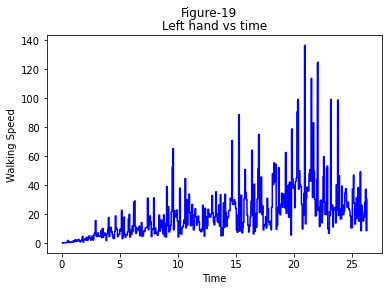

In [49]:
#Graph comp. of Walking speed and data set1 
plt.plot(acc_read_variable1['time'],acc_read_variable1['Speed'],color='blue')
plt.xlabel('Time')
plt.ylabel("Walking Speed")
plt.title("Left hand vs time")
plt.suptitle('Figure-19')

Text(0.5, 0.98, 'Figure-20')

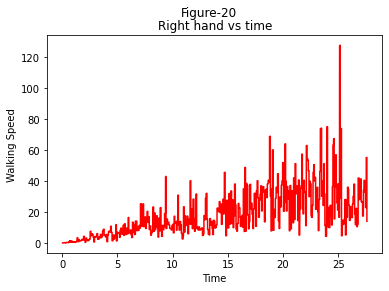

In [50]:
#Graph comp. of Walking speed and data set2 
plt.plot(acc_read_variable2['time'],acc_read_variable2['Speed'],color='red')
plt.xlabel('Time')
plt.ylabel("Walking Speed")
plt.title("Right hand vs time")
plt.suptitle('Figure-20')

# Machine Learning Tools 

In [51]:
# Accuracy check- Machine learning tool 
X = acc_read_variable1[['time','ax', 'ay','az']]
y = acc_read_variable1['Speed (m/s)']

lab_enc = preprocessing.LabelEncoder()
X.ax = lab_enc.fit_transform(X.ax)
X.ay = lab_enc.fit_transform(X.ay)
X.az = lab_enc.fit_transform(X.az)
X.time = lab_enc.fit_transform(X.time)

y = lab_enc.fit_transform(y)
X_train, X_valid,y_train, y_valid = train_test_split(X,y)

#Random Forest Classifier 

model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10)                  
model.fit(X_train,y_train)
model.score(X_valid, y_valid)
y_predict = model.predict(X_valid)
#test_result = rfc.predict(read_variable_test)
#print(result)


print(accuracy_score(y_valid, y_predict))

C:\Users\kings\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0.6744186046511628


# RandomForestClassifier

In [52]:
print("For GPS left")
print(model.fit(X_train,y_train))
print(model.score(X_valid, y_valid))

For GPS left
RandomForestClassifier(max_depth=3, min_samples_leaf=10)
0.6534883720930232


# Gaussian

In [53]:
# Gaussian 
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
print("For GPS left")
print(model.score(X_train, y_train))
#print(model.score(X_valid, y_valid))

print(accuracy_score(y_valid, y_predict))

For GPS left
0.9821289821289821
0.9883720930232558


# K-nearest neighbours classifier

In [54]:
# K-nearest neighbours classifier.
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
print("For GPS left walk")
print(model.score(X_train, y_train))
#print(model.score(X_valid, y_valid))
print(accuracy_score(y_valid, y_predict))

For GPS left walk
0.9261849261849262
0.827906976744186


# Standard Scaler , KNeighborsClassifier

In [55]:
# Standard Scaler , KNeighborsClassifier
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=9)
)
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
print("For GPS left walk")
print(model.score(X_train, y_train))
#print(model.score(X_valid, y_valid))
print(accuracy_score(y_valid, y_predict))

For GPS left walk
0.7365967365967366
0.6697674418604651


# neural network regressor

In [56]:
# neural network regressor
model = MLPRegressor(hidden_layer_sizes=(8, 6),
                     activation='logistic', solver='lbfgs')
model.fit(X_train, y_train)
print("For GPS left walk")
print(model.score(X_train, y_train))

print(model.score(X_valid, y_valid))


For GPS left walk
0.5609771743136621
0.5230803200669616


# RandomForestRegressor

In [57]:
#  RandomForestRegressor
model = RandomForestRegressor(30, max_depth=4)
model.fit(X_train, y_train)
print("For GPS left walk")
y_predict = model.predict(X_valid)
print(model.score(X_train, y_train))
print(model.score(X_valid, y_valid))
#print(accuracy_score(y_valid, y_predict))

For GPS left walk
0.9686142707633755
0.9694456537270013


# K-Neighbor Regressor 

In [58]:
# K-Neighbor Regressor 
model = KNeighborsRegressor(5)
model.fit(X_train, y_train)
print("For GPS left walk")
y_predict = model.predict(X_valid)
print(model.score(X_train, y_train))
print(model.score(X_valid, y_valid))
#print(accuracy_score(y_valid, y_predict))

For GPS left walk
0.9808705742420467
0.9585370105214228


# Voting Classifier

In [59]:
# Best Result in the voting Classifier 
model = VotingClassifier([
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(5)),
    ('svm', SVC(kernel='linear', C=0.1)),
    ('tree1', DecisionTreeClassifier(max_depth=4)),
    ('tree2', DecisionTreeClassifier(min_samples_leaf=10)),
])
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
print("For GPS left walk")
print(model.score(X_train, y_train))
#print(model.score(X_valid, y_valid))
print(accuracy_score(y_valid, y_predict))


For GPS left walk
0.9961149961149961
0.9976744186046511


# Apply Machine learning tools on 2nd Dataset

In [60]:
X = acc_read_variable2[['time','ax', 'ay','az']]
y = acc_read_variable2['Speed (m/s)']

lab_enc = preprocessing.LabelEncoder()
X.ax = lab_enc.fit_transform(X.ax)
X.ay = lab_enc.fit_transform(X.ay)
X.az = lab_enc.fit_transform(X.az)
X.time = lab_enc.fit_transform(X.time)


y = lab_enc.fit_transform(y)
X_train, X_valid,y_train, y_valid = train_test_split(X,y)

#Random Forest Classifier 

model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10)                  
model.fit(X_train,y_train)
model.score(X_valid, y_valid)
y_predict = model.predict(X_valid)
#test_result = rfc.predict(read_variable_test)
#print(result)

print("For GPS Right walk")
print(model.fit(X_train,y_train))
#print(model.score(X_valid, y_valid))
print(accuracy_score(y_valid, y_predict))

C:\Users\kings\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


For GPS Right walk
RandomForestClassifier(max_depth=3, min_samples_leaf=10)
0.5969289827255279


# Gaussian

In [61]:
# Gaussian 
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
print("For GPS right walk")
print(model.score(X_train, y_train))
#print(model.score(X_valid, y_valid))

print(accuracy_score(y_valid, y_predict))

For GPS right walk
0.9807938540332907
0.9712092130518234


# K-nearest neighbours classifier.

In [62]:
# K-nearest neighbours classifier.
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
print("For GPS right walk")
print(model.score(X_train, y_train))
#print(model.score(X_valid, y_valid))
print(accuracy_score(y_valid, y_predict))

For GPS right walk
0.9218950064020487
0.8234165067178503


# Standard Scaler , KNeighborsClassifier

In [63]:
# Standard Scaler , KNeighborsClassifier
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=9)
)
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
print("For GPS right walk")
print(model.score(X_train, y_train))
#print(model.score(X_valid, y_valid))
print(accuracy_score(y_valid, y_predict))

For GPS right walk
0.7528809218950064
0.6986564299424184


# Neural network regressor

In [64]:
# neural network regressor
model = MLPRegressor(hidden_layer_sizes=(8, 6),
                     activation='logistic', solver='lbfgs')
model.fit(X_train, y_train)
print("For GPS Right walk")
print(model.score(X_train, y_train))

print(model.score(X_valid, y_valid))

For GPS Right walk
0.3957862630824541
0.41262943955424003


C:\Users\kings\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#  RandomForestRegressor

In [65]:
#  RandomForestRegressor
model = RandomForestRegressor(30, max_depth=4)
model.fit(X_train, y_train)
print("For GPS Right walk")
y_predict = model.predict(X_valid)
print(model.score(X_train, y_train))
print(model.score(X_valid, y_valid))
#print(accuracy_score(y_valid, y_predict))

For GPS Right walk
0.987014218222289
0.9819469531492696


# K-Neighbor Regressor

In [66]:
# K-Neighbor Regressor 
model = KNeighborsRegressor(5)
model.fit(X_train, y_train)
print("For GPS Right walk")
y_predict = model.predict(X_valid)
print(model.score(X_train, y_train))
print(model.score(X_valid, y_valid))
#print(accuracy_score(y_valid, y_predict))

For GPS Right walk
0.9876093027292725
0.9746840825290972


# Voting Classifier 

In [67]:
# Best Result in the voting Classifier 
model = VotingClassifier([
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(5)),
    ('svm', SVC(kernel='linear', C=0.1)),
    ('tree1', DecisionTreeClassifier(max_depth=4)),
    ('tree2', DecisionTreeClassifier(min_samples_leaf=10)),
])
model.fit(X_train, y_train)
y_predict = model.predict(X_valid)
print("For GPS Right walk")
print(model.score(X_train, y_train))
#print(model.score(X_valid, y_valid))
print(accuracy_score(y_valid, y_predict))

For GPS Right walk
0.9929577464788732
0.9865642994241842
